## 直观理解

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-4,5,1)

In [3]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
y = np.array((x>=-2)&(x<=2),dtype='int')

In [5]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

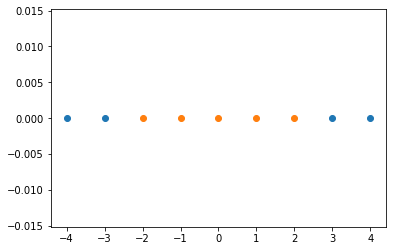

In [6]:
plt.scatter(x[y==0],[0]*len(x[y==0]))
plt.scatter(x[y==1],[0]*len(x[y==1]))
plt.show()


In [7]:
def Gaussian(x,l):
    gamma=1.0
    return np.exp(-gamma*(x-l)**2)

In [8]:
l1,l2 = -1,1

X_new = np.empty((len(x),2))

In [9]:
for i,data in enumerate(x):
    X_new[i,0] = Gaussian(data,l1)
    X_new[i,1] = Gaussian(data,l2)

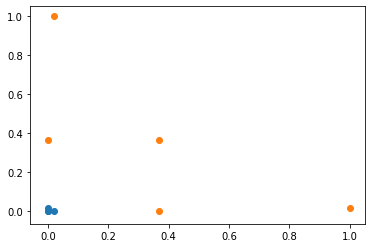

In [10]:
plt.scatter(X_new[y==0,0],X_new[y==0,1])
plt.scatter(X_new[y==1,0],X_new[y==1,1])
plt.show()


## sklearn 中的RBF

In [11]:
import numpy as ap
import matplotlib.pyplot as plt
from sklearn import datasets

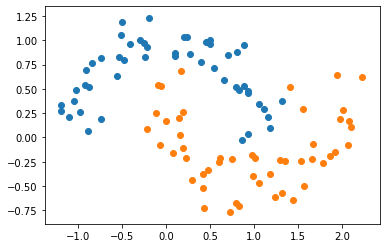

In [12]:
X, y = datasets.make_moons(noise=0.15,random_state=666)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf',gamma=gamma))
    ])

In [14]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1.0,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [15]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#FF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


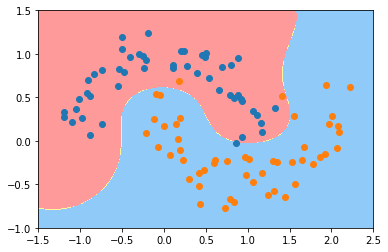

In [17]:
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [20]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=100,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


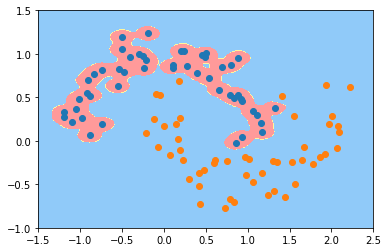

In [21]:
plot_decision_boundary(svc_gamma100,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [22]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=10,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


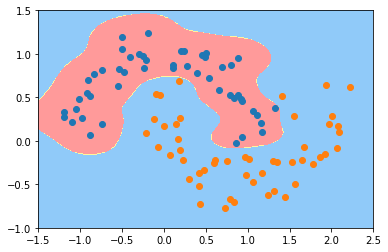

In [23]:
plot_decision_boundary(svc_gamma10,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [24]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


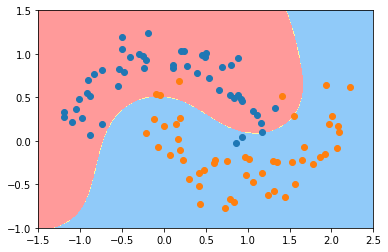

In [25]:
plot_decision_boundary(svc_gamma05,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [26]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


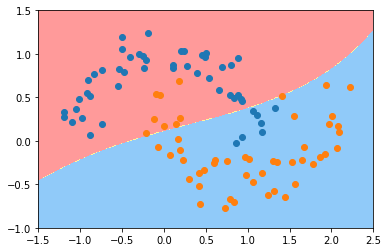

In [27]:
plot_decision_boundary(svc_gamma01,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()